<a href="https://colab.research.google.com/github/fkrhtmq123/Tensorflow/blob/master/tf13_auto_encoder_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
  날짜 : 2020/08/25
  이름 : 김동욱
  내용 : 딥러닝 오토인코더(AutoEncoder) MNIST 실습하기
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [2]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [3]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [4]:
# Encoder 모델 구성
encoder_inputs = Input(shape=(784, ))

encoder_hidden = Dense(32, activation='relu')(encoder_inputs)

encoder_outputs = Dense(2)(encoder_hidden)

encoder_model = Model(encoder_inputs, encoder_outputs)
encoder_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 25,186
Trainable params: 25,186
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Decoder 모델 구성
#decoder_inputs = Input(shape=(2, ))
decoder_inputs = Dense(2)(encoder_outputs)

decoder_hidden = Dense(32, activation='relu')(decoder_inputs)

decoder_outputs = Dense(784)(decoder_hidden)

#decoder_model = Model(decoder_inputs, decoder_outputs)
#decoder_model.summary()

In [6]:
# 인코더, 디코더 모델 구성
#encoder_in = Input(shape=(784, ))
#em = encoder_model(encoder_in)
#decoder_out = decoder_model(em)

auto_encoder = Model(encoder_inputs, decoder_outputs)
auto_encoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 51,160
Trainable params: 51,160
Non-trainable params: 0
__________________________________________________

In [7]:
# 모델 설정 및 학습하기
auto_encoder.compile(optimizer='adam', loss='mse')
auto_encoder.fit(x_train, 
                 x_train, 
                 epochs=10, 
                 batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0644
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0547
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0527
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0508
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0496
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0489
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0484
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0480
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0477
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0475


In [8]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[ 2.0264029e-03,  3.4545194e-03, -6.2841922e-05, ...,
        -1.1612862e-02,  6.3198432e-04,  1.5781075e-03],
       [ 1.1605390e-03, -2.4345331e-04,  1.3161413e-03, ...,
        -8.9966133e-04,  1.0104440e-03, -7.3992275e-04],
       [ 2.4304468e-04, -2.7961489e-03, -2.2181738e-03, ...,
         5.5776872e-03, -1.4508627e-03, -2.3758858e-03],
       ...,
       [ 1.6714178e-03,  4.4308808e-03,  3.4874864e-04, ...,
        -9.6031055e-03,  1.3448186e-03, -8.9079887e-04],
       [ 2.9910286e-04, -1.2545045e-03, -4.3614022e-04, ...,
         3.9089285e-04,  1.1782609e-03,  6.2983483e-05],
       [ 1.3307252e-03,  2.0484906e-03,  5.5370480e-04, ...,
        -1.8261448e-03,  4.5883283e-04,  7.5109303e-04]], dtype=float32)

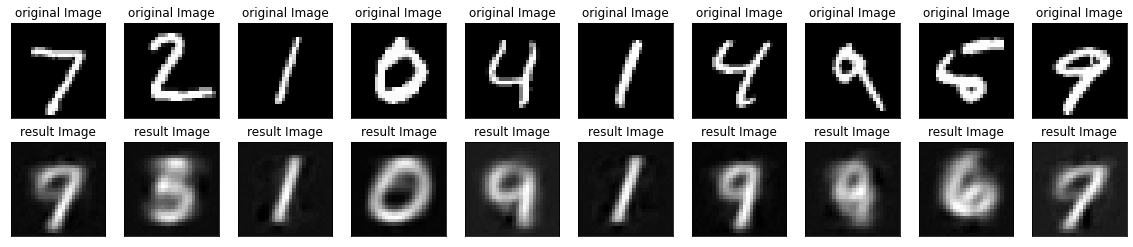

In [9]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # 오리지날 이미지
  ax = plt.subplot(2, 10, i + 1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i + 11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [13]:
# 인코더 모델 학습하기
#encoder_model.compile(optimizer='adam', loss='mse')
#encoder_model.fit(x_train, x_train, epochs=3, batch_size=256) 인코더와 디코더의 차수가 안 맞아 실행 안됨
encoder_pre_result = encoder_model.predict(x_test)
encoder_pre_result

array([[-9.400788  , -1.6066473 ],
       [-0.21156207, -3.2837727 ],
       [ 7.557022  , -0.4464182 ],
       ...,
       [-8.0130005 ,  0.16992736],
       [ 2.7364826 , -2.6752384 ],
       [-5.917271  , -6.7861257 ]], dtype=float32)

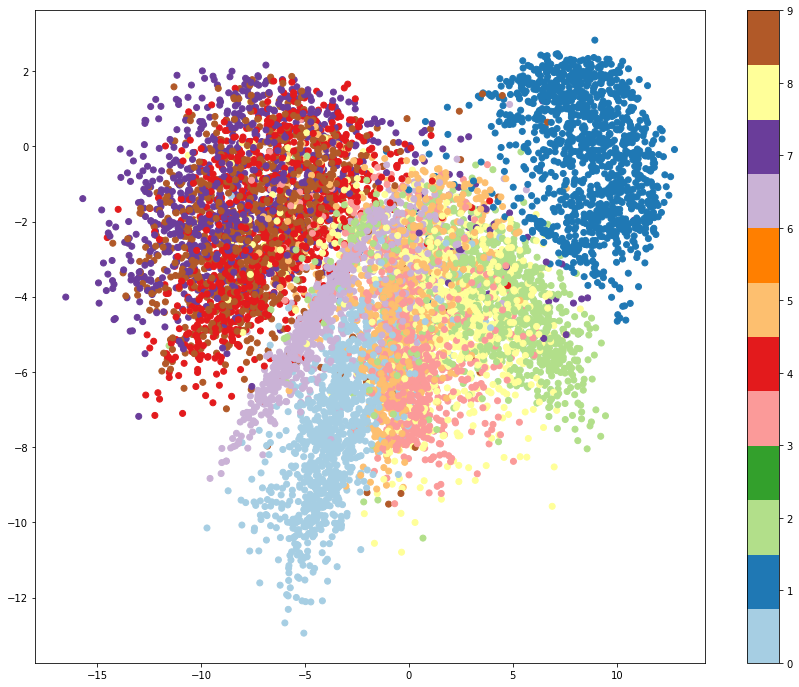

In [18]:
# 인코더 결과값 군집확인
plt.figure(figsize=(15, 12))
plt.scatter(x=encoder_pre_result[:, 0], y=encoder_pre_result[:, 1], c=y_test, cmap=plt.get_cmap('Paired'))
plt.colorbar()